### Things to do:
- <s>Seperate covariates into different groups</s>
- <s>Depict to see if there any specific covariates that determine race</s>

In [1]:
library(repr)
library(MASS)
library(dplyr)
library(GGally)
library(ggplot2)
library(ggfortify)
library(Hmisc)
library(lmtest)
library(car)
library(leaps)
library(pROC)
library(compare)
library(tidyverse)
library(gridExtra)
library(tigris)
library(sf)
options(tigris_class = "sf")
options(tigris_use_cache = TRUE)


Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

Type 'citation("pROC")' for a citation.

Attaching pa

In [2]:
pol = read.csv("police_killings_cleaned.csv", stringsAsFactors = FALSE)
head(pol)
cat(paste("Number of rows in police killings dataset: ", dim(pol)[1]))
colnames(pol)[colnames(pol)=="geo_id"] = "CensusTract"
acs = read.csv("acs2015_census_tract_data.csv", stringsAsFactors = FALSE)
head(acs)
cat(paste("Number of rows in survey dataset: ", dim(acs)[1]))

# merging the datasets
combined = merge(pol, acs, by="CensusTract")
head(combined)
cat(paste("Number of rows in combined dataset: ", dim(combined)[1]))

# dropping missing data
combined = na.omit(combined)
cat(paste("Number of rows in complete combined dataset: ", dim(combined)[1]))

name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
A'donte Washington,17,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,5.6,28375,51367,54766,0.9379359,3,3,14.1,0.09768638,0.16850951
Aaron Rutledge,28,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,0.5,14678,27972,40930,0.6834107,2,1,28.8,0.06572379,0.11140236
Aaron Siler,27,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,16.8,25286,45365,54930,0.8258693,2,3,14.6,0.16629314,0.14731227
Aaron Valdez,26,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,98.8,17194,48295,55909,0.8638144,3,3,11.7,0.12482727,0.05013293
Adam Jovicic,30,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,1.7,33954,68785,49669,1.3848678,5,4,1.9,0.06354983,0.40395421
Adam Reinhart,30,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,79,15523,20833,53596,0.3887044,1,1,58,0.07365145,0.10295519


Number of rows in police killings dataset:  467

CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,⋯,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,⋯,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0,5.4
1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,⋯,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0,13.3
1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,⋯,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0,6.2
1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,⋯,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0,10.8
1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,⋯,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0,4.2
1001020600,Alabama,Autauga,3851,1787,2064,13.1,72.9,11.9,0.0,⋯,0.0,6.0,4.5,19.8,1560,79.4,14.7,5.8,0,10.9


Number of rows in survey dataset:  74001

CensusTract,name,age,gender,raceethnicity,month,day,year,streetaddress,city,⋯,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1003010300,Gilbert Fleury,55,Male,White,March,11,2015,Cliffs Landing Rd,Bay Minette,⋯,0.8,0.3,2.8,28.8,3033,79.4,17.5,2.4,0.8,7.7
1051030902,A'donte Washington,17,Male,Black,February,23,2015,Clearview Ln,Millbrook,⋯,0.0,7.1,0.4,30.1,1847,71.5,22.0,6.5,0.0,9.1
1073002000,Douglas Harris,74,Male,Black,March,27,2015,7901 1st Ave S,Birmingham,⋯,1.7,3.2,3.5,23.0,1464,86.8,10.9,2.3,0.0,8.0
1073005000,Stanley Grant,39,Male,Black,February,20,2015,2200 Green Springs Hwy,Birmingham,⋯,3.0,2.5,0.9,18.4,2221,86.2,11.1,2.7,0.0,4.9
1073014412,William 'Rusty' Smith,54,Male,White,March,10,2015,700 Valley St,Hoover,⋯,0.0,0.5,2.8,22.0,2597,71.5,25.5,2.5,0.5,2.7
1079979500,Shane Watkins,40,Male,White,March,19,2015,1040 County Rd 249,Moulton,⋯,0.0,0.0,0.0,26.6,1909,77.6,13.1,8.0,1.3,9.7


Number of rows in combined dataset:  467Number of rows in complete combined dataset:  435

In [3]:
regions = read.csv('us_census_bureau_regions.csv', stringsAsFactors = FALSE)
head(regions)

State,State.Code,Region,Division
Alaska,AK,West,Pacific
Alabama,AL,South,East South Central
Arkansas,AR,South,West South Central
Arizona,AZ,West,Mountain
California,CA,West,Pacific
Colorado,CO,West,Mountain


In [4]:
for (row in 1:nrow(combined)) {
    st = combined[row, "State"]
    subset_df = regions[regions$State==st,]
    if (nrow(subset_df) > 1) {
        print("Error")
    } else {
        region = unlist(unname(subset_df['Region']))
        div = unlist(unname(subset_df['Division']))
        combined[row, "Region"] = region
        combined[row, "Division"] = div
    }
}

In [5]:
combined

,CensusTract,name,age,gender,raceethnicity,month,day,year,streetaddress,city,⋯,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Region,Division
1,1003010300,Gilbert Fleury,55,Male,White,March,11,2015,Cliffs Landing Rd,Bay Minette,⋯,2.8,28.8,3033,79.4,17.5,2.4,0.8,7.7,South,East South Central
2,1051030902,A'donte Washington,17,Male,Black,February,23,2015,Clearview Ln,Millbrook,⋯,0.4,30.1,1847,71.5,22.0,6.5,0.0,9.1,South,East South Central
3,1073002000,Douglas Harris,74,Male,Black,March,27,2015,7901 1st Ave S,Birmingham,⋯,3.5,23.0,1464,86.8,10.9,2.3,0.0,8.0,South,East South Central
4,1073005000,Stanley Grant,39,Male,Black,February,20,2015,2200 Green Springs Hwy,Birmingham,⋯,0.9,18.4,2221,86.2,11.1,2.7,0.0,4.9,South,East South Central
5,1073014412,William 'Rusty' Smith,54,Male,White,March,10,2015,700 Valley St,Hoover,⋯,2.8,22.0,2597,71.5,25.5,2.5,0.5,2.7,South,East South Central
6,1079979500,Shane Watkins,40,Male,White,March,19,2015,1040 County Rd 249,Moulton,⋯,0.0,26.6,1909,77.6,13.1,8.0,1.3,9.7,South,East South Central
7,1089002921,Anthony Briggs,37,Male,Black,May,25,2015,1100 E Gateway Dr SE,Huntsville,⋯,1.7,21.1,3114,81.0,15.3,3.8,0.0,6.1,South,East South Central
8,1123962400,Fletcher Stewart,47,Male,White,February,11,2015,Booger Hollow Rd,Dadeville,⋯,3.2,22.5,1732,63.6,24.2,12.2,0.0,9.3,South,East South Central
9,2020000901,Larry Kobuk,34,Male,Native American,January,28,2015,"Corrections Department, 1400 E 4th Ave",Anchorage,⋯,3.0,19.0,1856,81.8,12.3,5.9,0.0,10.2,West,Pacific
10,2020000902,John Whittaker,34,Male,Hispanic/Latino,February,10,2015,1503 Medfra St,Anchorage,⋯,17.2,15.0,1537,62.8,27.7,9.4,0.0,6.8,West,Pacific


In [6]:
combined["is_black"] = combined["raceethnicity"] == 'Black'

In [7]:
colnames(combined)

[1] "CensusTract"          "name"                 "age"                 
 [4] "gender"               "raceethnicity"        "month"               
 [7] "day"                  "year"                 "streetaddress"       
[10] "city"                 "state"                "latitude"            
[13] "longitude"            "state_fp"             "county_fp"           
[16] "tract_ce"             "county_id"            "namelsad"            
[19] "lawenforcementagency" "cause"                "armed"               
[22] "pop"                  "share_white"          "share_black"         
[25] "share_hispanic"       "p_income"             "h_income"            
[28] "county_income"        "comp_income"          "county_bucket"       
[31] "nat_bucket"           "pov"                  "urate"               
[34] "college"              "State"                "County"              
[37] "TotalPop"             "Men"                  "Women"               
[40] "Hispanic"             "White"                "Black"               
[43] "Native"               "Asian"                "Pacific"             
[46] "Citizen"              "Income"               "IncomeErr"           
[49] "IncomePerCap"         "IncomePerCapErr"      "Poverty"             
[52] "ChildPoverty"         "Professional"         "Service"             
[55] "Office"               "Construction"         "Production"          
[58] "Drive"                "Carpool"              "Transit"             
[61] "Walk"                 "OtherTransp"          "WorkAtHome"          
[64] "MeanCommute"          "Employed"             "PrivateWork"         
[67] "PublicWork"           "SelfEmployed"         "FamilyWork"          
[70] "Unemployment"         "Region"               "Division"            
[73] "is_black"

In [8]:
dim(combined)

[1] 435  73

#### Groups to look at correlations
- killings and transport
    - 'Drive' 
    - 'Carpool' 
    - 'Transit' 
    - 'Walk' 
    - 'OtherTransp' 
    - 'WorkAtHome' 
    - 'MeanCommute'
- killings and employment
    - Graph 1
        - 'Service'
        - 'Office'
        - 'Construction'
        - 'Professional'
        - 'Production'
    - Graph 2
        - 'Employed' 
        - 'PrivateWork'
        - 'PublicWork'
        - 'SelfEmployed'
        - 'FamilyWork'
        - 'Unemployment'
- <s>killings and education</s>
    - only has college and an indicator
- killings and income
    - income by individual
        - <s>'p_income'</s> 
        - 'h_income'
        - 'county_income'
        - 'comp_income'
        - 'county_bucket'
        - 'nat_bucket'
        - <s>'pov' </s>
    - income by where the individual lives
        - 'Income'
        - 'IncomeErr'
        - 'IncomePerCap'
        - 'IncomePerCapErr'
        - 'Poverty'

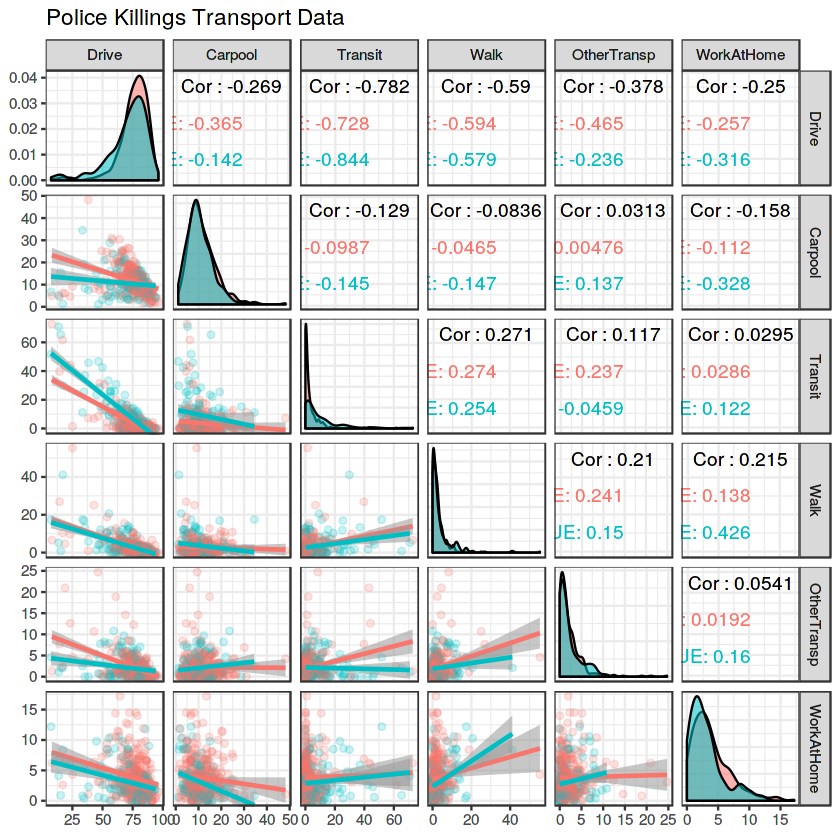

In [8]:
ggpairs(data=combined, mapping=ggplot2::aes(colour = is_black, alpha = 0.7), title="Police Killings Transport Data",
        lower=list(continuous=wrap("smooth", alpha = 0.2)),
        columns = c('Drive','Carpool','Transit','Walk','OtherTransp','WorkAtHome')) + theme_bw()

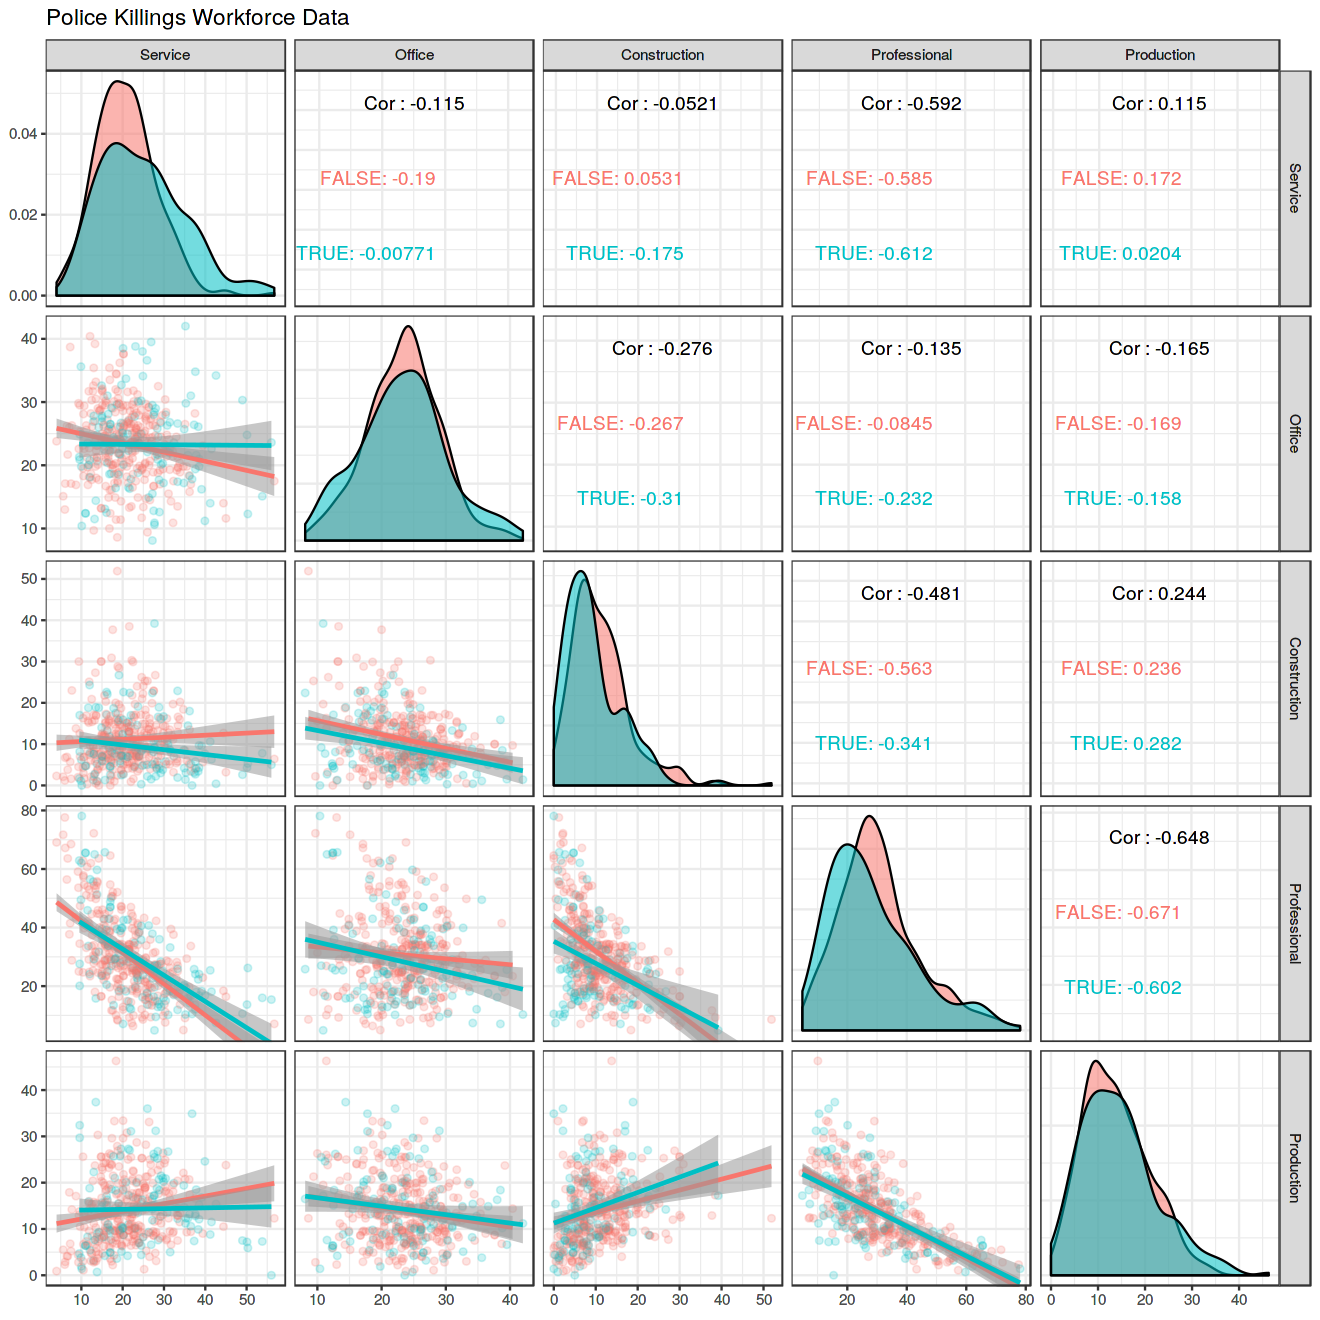

In [9]:
options(repr.plot.width = 11, repr.plot.height = 11)

ggpairs(data=combined, mapping=ggplot2::aes(colour = is_black, alpha = 0.7), title="Police Killings Workforce Data",
        lower=list(continuous=wrap("smooth", alpha = 0.2)),
        columns = c('Service','Office','Construction','Professional','Production')) + theme_bw()

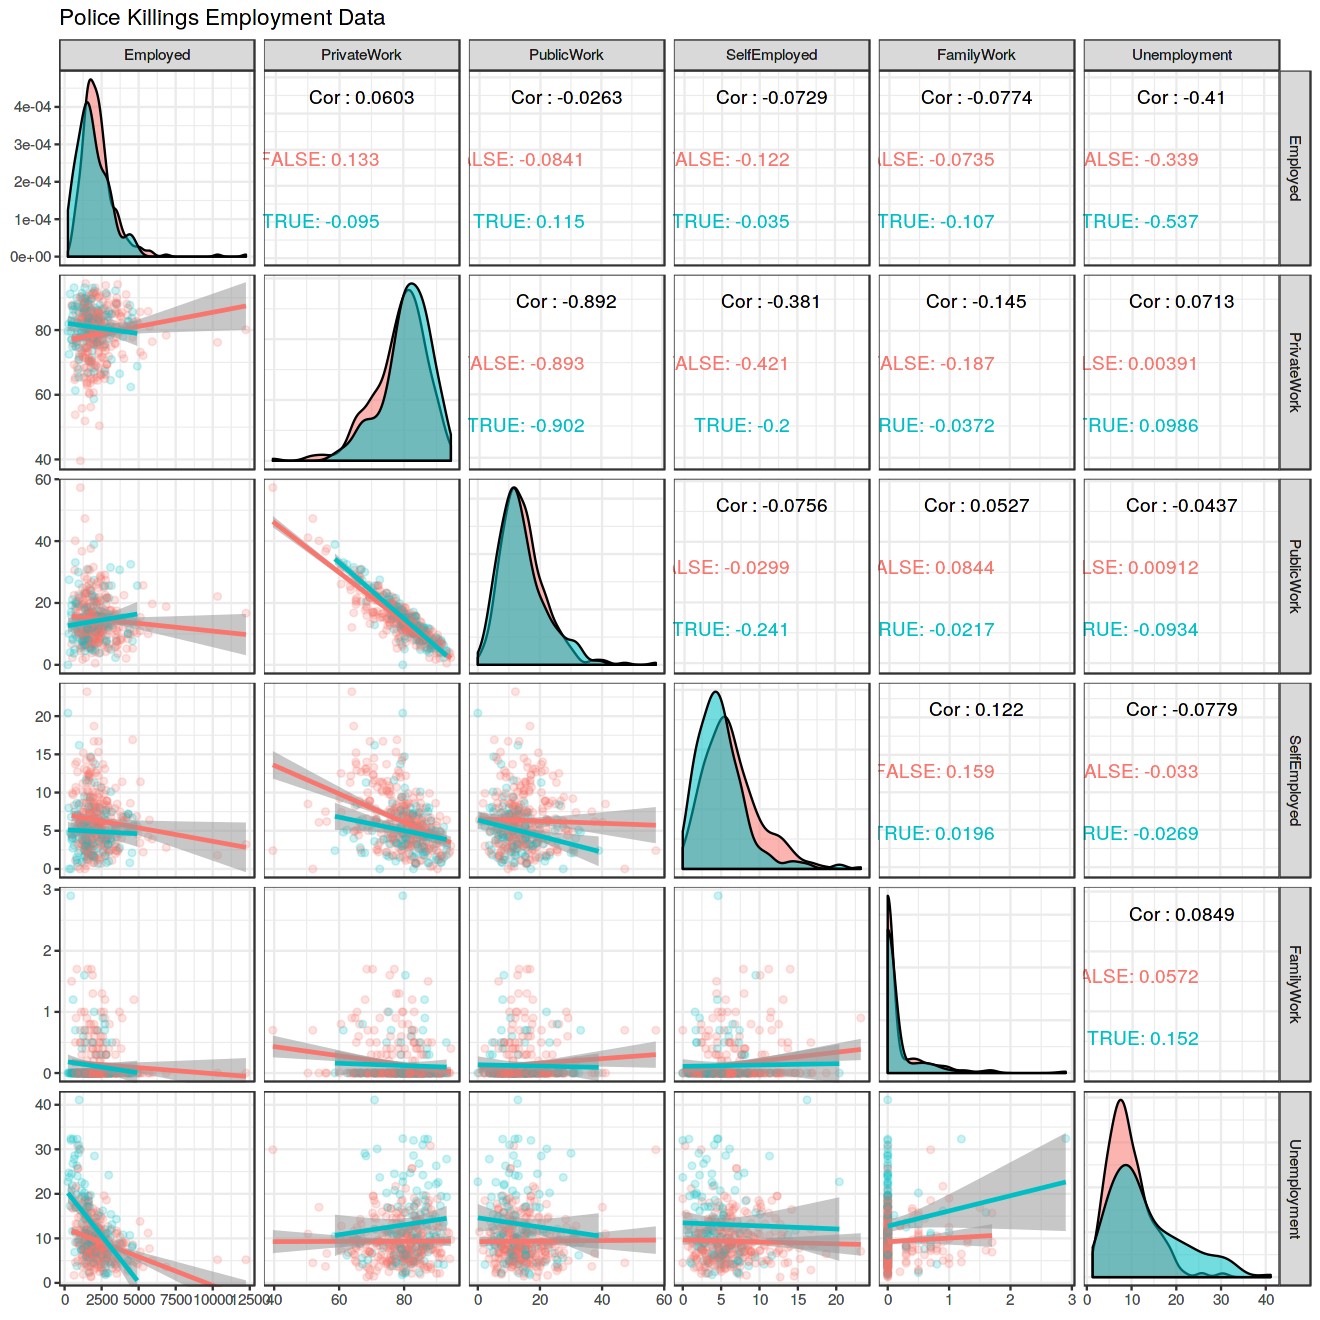

In [10]:
ggpairs(data=combined, mapping=ggplot2::aes(colour = is_black, alpha = 0.7), title="Police Killings Employment Data",
        lower=list(continuous=wrap("smooth", alpha = 0.2)),
        columns = c('Employed','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment')) + theme_bw()

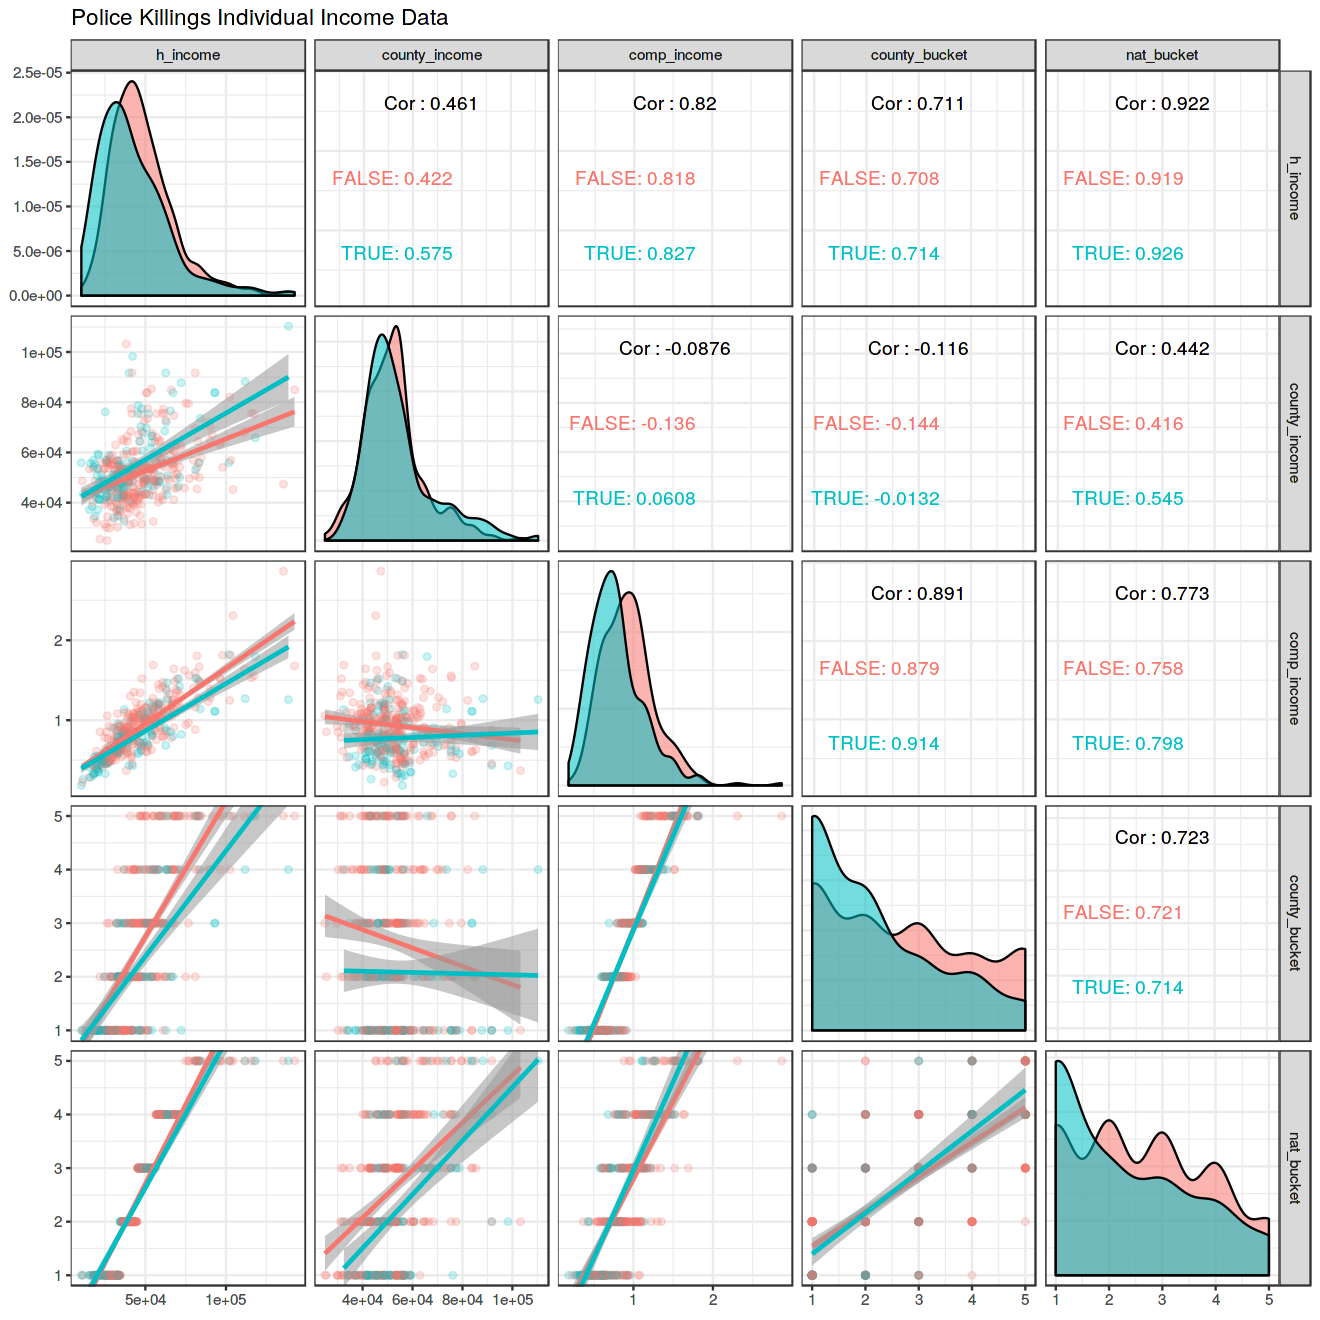

In [11]:
ggpairs(data=combined, mapping=ggplot2::aes(colour = is_black, alpha = 0.7), title="Police Killings Individual Income Data",
        lower=list(continuous=wrap("smooth", alpha = 0.2)),
        columns = c('h_income','county_income','comp_income','county_bucket','nat_bucket')) + theme_bw()

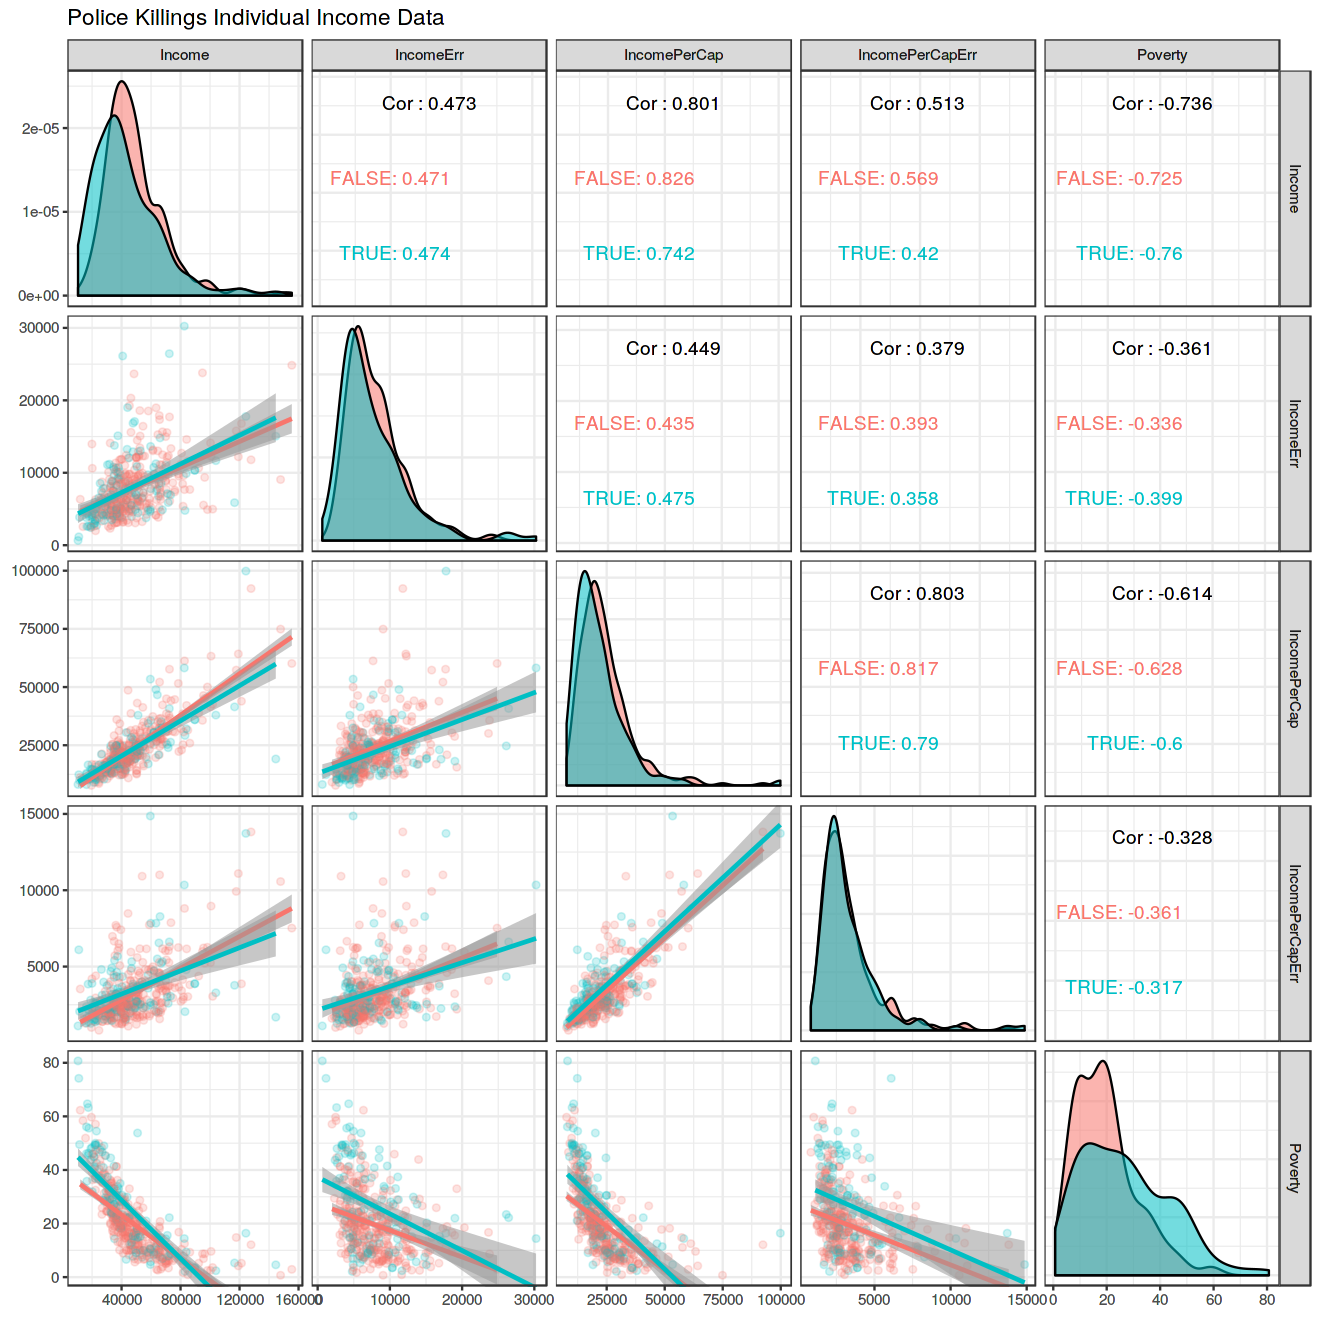

In [12]:
ggpairs(data=combined, mapping=ggplot2::aes(colour = is_black, alpha = 0.7), title="Police Killings Individual Income Data",
        lower=list(continuous=wrap("smooth", alpha = 0.2)),
        columns = c('Income','IncomeErr','IncomePerCap','IncomePerCapErr','Poverty')) + theme_bw()

#### Using best subset selection to choose best model predictors

In [22]:
names(combined)

[1] "CensusTract"          "name"                 "age"                 
 [4] "gender"               "raceethnicity"        "month"               
 [7] "day"                  "year"                 "streetaddress"       
[10] "city"                 "state"                "latitude"            
[13] "longitude"            "state_fp"             "county_fp"           
[16] "tract_ce"             "county_id"            "namelsad"            
[19] "lawenforcementagency" "cause"                "armed"               
[22] "pop"                  "share_white"          "share_black"         
[25] "share_hispanic"       "p_income"             "h_income"            
[28] "county_income"        "comp_income"          "county_bucket"       
[31] "nat_bucket"           "pov"                  "urate"               
[34] "college"              "State"                "County"              
[37] "TotalPop"             "Men"                  "Women"               
[40] "Hispanic"             "White"                "Black"               
[43] "Native"               "Asian"                "Pacific"             
[46] "Citizen"              "Income"               "IncomeErr"           
[49] "IncomePerCap"         "IncomePerCapErr"      "Poverty"             
[52] "ChildPoverty"         "Professional"         "Service"             
[55] "Office"               "Construction"         "Production"          
[58] "Drive"                "Carpool"              "Transit"             
[61] "Walk"                 "OtherTransp"          "WorkAtHome"          
[64] "MeanCommute"          "Employed"             "PrivateWork"         
[67] "PublicWork"           "SelfEmployed"         "FamilyWork"          
[70] "Unemployment"         "Region"               "Division"            
[73] "is_black"

In [45]:
combined$p_income <- as.numeric(combined$p_income)

In [46]:
red.subset <- regsubsets(is_black ~ age + gender + cause + armed + p_income + h_income + college + IncomePerCap +
                         Poverty + ChildPoverty + Professional + Service + Office + Construction + Production
                         + Drive + Carpool + Transit + Walk + OtherTransp + WorkAtHome + MeanCommute + PrivateWork 
                         + PublicWork + SelfEmployed + FamilyWork + Unemployment, data = combined, method = 'forward')
summary(red.subset)

Subset selection object
Call: regsubsets.formula(is_black ~ age + gender + cause + armed + 
    p_income + h_income + college + IncomePerCap + Poverty + 
    ChildPoverty + Professional + Service + Office + Construction + 
    Production + Drive + Carpool + Transit + Walk + OtherTransp + 
    WorkAtHome + MeanCommute + PrivateWork + PublicWork + SelfEmployed + 
    FamilyWork + Unemployment, data = combined, method = "forward")
36 Variables  (and intercept)
                        Forced in Forced out
age                         FALSE      FALSE
genderMale                  FALSE      FALSE
causeGunshot                FALSE      FALSE
causeStruck by vehicle      FALSE      FALSE
causeTaser                  FALSE      FALSE
causeUnknown                FALSE      FALSE
armedFirearm                FALSE      FALSE
armedKnife                  FALSE      FALSE
armedNo                     FALSE      FALSE
armedNon-lethal firearm     FALSE      FALSE
armedOther                  FALSE      FALS